# Data Prep and Cleaning

## Import Libraries and Packages

In [22]:
## Import Packages/Libraries

# json cleaning
import requests
# data format
import json
# regular expressions for specific manipulations
import re
# working with data frames
import pandas as pd
from pandas import DataFrame
# method for tokenizing, vectorizing, and changing into data frame
# for creating corpus on computer
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
from bs4 import BeautifulSoup 
#Beautiful Soup is used to parse and prettify raw web data
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# json cleaning
import requests
# regular expressions for specific manipulations
import re
# working with data frames
import pandas as pd
from pandas import DataFrame
# method for tokenizing, vectorizing, and changing into data frame
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hisie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hisie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Getting NewsAPI data

In [23]:
# CODING THE API

# create variable containing the api endpoint
End="https://newsapi.org/v2/everything"

In [24]:
# API Request for Banned Books
# create a dictionary containing the parameters for the api request for banned books
banned_books_URL = {'apiKey': 'ffc38260b8de4233ace9feafdfdfd33e',
           'sortBy': 'top',
           'q': 'banned books'}
# make the request to get the json data
banned_books_response=requests.get(End, banned_books_URL)
#confirm it request ran
print(banned_books_response) 
# save as json data
banned_books_json = banned_books_response.json()
# print the json output of the data
print(banned_books_json) 

<Response [200]>
{'status': 'ok', 'totalResults': 247, 'articles': [{'source': {'id': None, 'name': 'Techdirt'}, 'author': 'Tim Cushing', 'title': 'People Who Can’t Get Books Banned From Libraries Are Now Hiding Them Or Throwing Them In The Trash', 'description': 'The “rule of law” folks (who also have a sizable overlap with the “party of free speech“) are at it again. Around the nation, legislators emboldened by the Republican party’s embrace of bigotry have been passing bills banning books (or, worse, subjecting libr…', 'url': 'https://www.techdirt.com/2025/02/28/people-who-cant-get-books-banned-from-libraries-are-now-hiding-them-or-throwing-them-in-the-trash/', 'urlToImage': 'https://www.techdirt.com/wp-content/themes/techdirt/assets/images/td-rect-logo-white.png', 'publishedAt': '2025-02-28T17:34:00Z', 'content': 'from the just-for-the-sheer-assholery-of-it dept\r\nThe “rule of law” folks (who also have a sizable overlap with the “party of free speech“) are at it again. Around the 

In [25]:
# API Request for new_books Articles
# create a dictionary containing the parameters for the api request for the key word new_books
new_books_URL = {'apiKey': 'ffc38260b8de4233ace9feafdfdfd33e',
           'sortBy': 'top',
           'q': 'new books'}
# make the request to get the json data
new_books_response=requests.get(End, new_books_URL)
#confirm it request ran
print(new_books_response) 
# save as json data
new_books_json = new_books_response.json()
# print the json output of the data
print(new_books_json) 

<Response [200]>
{'status': 'ok', 'totalResults': 7565, 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Jay Peters', 'title': 'Flatiron Books says it will keep publishing book from ex-Meta employee', 'description': 'Flatiron Books, the publisher of a new book by an ex-Meta staffer alleging misconduct and harassment at the company, says in a statement that a recent arbitration order demanding that the book no longer be published has “no impact” on Macmillan. The ruling in…', 'url': 'https://www.theverge.com/news/629347/meta-careless-people-flatiron-books-macmillan', 'urlToImage': 'https://platform.theverge.com/wp-content/uploads/sites/2/2025/02/STK043_VRG_Illo_N_Barclay_3_Meta.jpg?quality=90&strip=all&crop=0%2C10.732984293194%2C100%2C78.534031413613&w=1200', 'publishedAt': '2025-03-13T18:29:11Z', 'content': 'Flatiron Books, the publisher of a new book by an ex-Meta staffer alleging misconduct and harassment at the company, says in a statement that a recent a

### Cleaning the JSON

In [26]:
# create a new csv file to save data to
banned_books_filename='BannedBooksNews.csv'
# open the file to write it
MyFILE=open(banned_books_filename, 'w')
# place the column names in -write to the first row
WriteThis='Date,Source,Title,Description\n'
MyFILE.write(WriteThis)
# close the file
MyFILE.close()

In [27]:
# create a new csv file to save data to
new_books_filename='NewBooksNews.csv'
# open the file to write it
MyFILE=open(new_books_filename, 'w')
# place the column names in -write to the first row
WriteThis='Date,Source,Title,Description\n'
MyFILE.write(WriteThis)
# close the file
MyFILE.close()

In [28]:
# create a function to edit json text data
def edit_json(filename, jsontxt):
    # open file to add the edited text in
    MyFILE=open(filename, "a")
    # go through each part of the json text
    for items in jsontxt["articles"]:
        #print(items, "\n\n\n")

        # clean the source by getting the name of it
        Source=items["source"]["name"]
        #print(Source)

        # clean the date
        Date=items["publishedAt"]
        NewDate=Date.split("T")
        Date=NewDate[0]
        #print(Date)

        # clean the Title
        Title=items["title"]
        # Replace punctuation with space
        Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', Title, flags=re.IGNORECASE)
        # Accept one or more copies of punctuation plus zero or more copies of a space and replace it with a single space
        Title=re.sub(' +', ' ', Title, flags=re.IGNORECASE)
        Title=re.sub(r'\"', ' ', Title, flags=re.IGNORECASE)
        Title=re.sub(r'[^a-zA-Z]', " ", Title, flags=re.VERBOSE)
        # remove commas
        Title=Title.replace(',', '')
        Title=' '.join(Title.split())
        # remove other unwanted characters
        Title=re.sub("\n|\r", "", Title)

        # clean the description
        Description=str(items["description"])
        # replace puntuation with space
        Description=re.sub(r'[,.;@#?!&$\-\']+', ' ', Description, flags=re.IGNORECASE)
        # Accept one or more copies of punctuation plus zero or more copies of a space and replace it with a single space
        Description=re.sub(' +', ' ', Description, flags=re.IGNORECASE)
        Description=re.sub(r'\"', ' ', Description, flags=re.IGNORECASE)
        Description=re.sub(r'[^a-zA-Z]', " ", Description, flags=re.VERBOSE)
        # remove all commas
        Description=Description.replace(',', '')
        Description=' '.join(Description.split())
        # remove other unwanted characters
        Description=re.sub("\n|\r", "", Description)

        #print("Title: ", Title, "\n")
        #print("Headline News Item: ", Description, "\n\n")
        
        # create string with the Date, Source, Title, and Description to write into csv
        WriteThis=str(Date)+","+str(Source)+","+ str(Title) + "," + str(Description) + "\n"
        #write into the csv
        MyFILE.write(WriteThis)
    
    ## CLOSE THE FILE
    MyFILE.close()


In [29]:
# call the function to clean the json and add to csv for banned books
edit_json(banned_books_filename, banned_books_json)

# call the function to clean the json and add to csv for new_books articles
edit_json(new_books_filename, new_books_json)

### Creating a Corpus

In [30]:
# function for getting the description list from the csv
def get_description_list(filename):
    # create a data frame from the csv file
    df = pd.read_csv(filename)

    # remove rows with na
    df = df.dropna()
    
    # create the list of descriptions
    descriptions=[]
    for description in df["Description"]:
        descriptions.append(description)

    # return the list
    return descriptions

In [31]:
# get banned_books descriptions using function
banned_books_descriptions=get_description_list(banned_books_filename)

# get new_books descriptions using function
new_books_descriptions=get_description_list(new_books_filename)

In [32]:
# create function for creating corpus from a list of descriptions and Label
def create_corpus(descriptions, Label, path):
    # start index at one
    index = 1
    # iterate through each article's description
    for article in descriptions:
        # Use the article's index for the filename (Label1, Label2, etc.)
        file_name = f"{Label}{index}.txt"
        file_path = os.path.join(path, file_name)
        
        # Get the article content (you can adjust this if you want other parts like title or description too)
        article_content = descriptions[index-1]
        
        # Write the content into the file
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(article_content)

        print(f"Written article {index} to {file_path}")

        # increase index
        index += 1

In [33]:
# create path to corpus 
path="C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News"

# add banned books descriptions to corpus with the label "books"
create_corpus(banned_books_descriptions, "banned_books_news", path)

# add new_books descriptions to corpus with the label "new_books"
create_corpus(new_books_descriptions, "new_books_news", path)

Written article 1 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news1.txt
Written article 2 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news2.txt
Written article 3 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news3.txt
Written article 4 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news4.txt
Written article 5 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news5.txt
Written article 6 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news6.txt
Written article 7 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news7.txt
Written article 8 to C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News\banned_books_news8.txt
Written article 9 to C:/Users/hisie/OneDrive/Documents/CU Boulde

### Creating a CSV

In [34]:
# create path to save the CSV file
csv_filename = "C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News.csv"

# open the file to append it
MyFILE=open(csv_filename, "a")

# add column titles
WriteThis="Label,Description\n"
MyFILE.write(WriteThis)
    
# add each banned_book description with label "Book"
for banned_books_description in banned_books_descriptions:
    WriteThis="Banned_News," + banned_books_description + "\n"
    MyFILE.write(WriteThis)

# add each new_books description with label "new_books"
for new_books_description in new_books_descriptions:
    WriteThis="New_News," + new_books_description + "\n"
    MyFILE.write(WriteThis)

# close the file
MyFILE.close()

### Creating df from Corpus

In [35]:
# create lemmatizer to use
from nltk.stem import WordNetLemmatizer 
my_lemmer = WordNetLemmatizer() 

# create stemmer to use
from nltk.stem.porter import PorterStemmer
my_stemmer = PorterStemmer()

In [36]:
# use the stemmer in a function on a list of words
def MY_STEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [my_stemmer.stem(word) for word in words]
    return [word for word in words if len(word) > 2]  # Only include words longer than 2 characters

# use the lemmer in a function on a list of words
def MY_LEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [my_lemmer.lemmatize(word) for word in words]
    return [word for word in words if len(word) > 2]  # Only include words longer than 2 characters

In [37]:
# create a list of file paths
file_paths = []
# also want a list of file_names
file_names = []
# iterate through each file in the directory and add its full path to the list
for name in os.listdir(path):
    # create the full path for each file
    # recall we already have path="C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Book-Woke"
    file_path = path + "/" + name  
    # add the full path to the list
    file_paths.append(file_path) 
    
    # extract the file name
    file_name=name.split(".") 
    # add the file name to the list
    file_names.append(file_name[0])

In [38]:
# use count vectorizer to create a df with 50 columns

# initialize the vectorizer using filename as the input
# note, words with numbers removed in earlier cleaning
my_cv1=CountVectorizer(input='filename', 
                        stop_words='english', #remove stop words
                        max_features=50 ,
                        tokenizer=MY_LEMMER 
                        )

## vectorize using file_paths
corpus_matrix=my_cv1.fit_transform(file_paths)

# get the column names from the features
corp_col_names=my_cv1.get_feature_names_out()

# create a data frame with the corpus matrix and the column names
corp_bw_df=pd.DataFrame(corpus_matrix.toarray(),columns=corp_col_names)
print(corp_bw_df.head())  

C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


   amazon  american  appeared  author  banned  best  black  book  character  \
0       0         0         0       0       0     0      0     1          0   
1       0         0         0       0       0     0      0     2          0   
2       0         0         0       0       0     0      0     1          0   
3       0         0         0       0       0     0      0     0          0   
4       0         0         0       0       0     0      0     0          0   

   company  ...  sunrise  think  time  trump  video  week  wild  work  world  \
0        0  ...        0      0     0      0      0     0     0     0      0   
1        0  ...        0      0     0      2      0     0     0     0      0   
2        0  ...        0      0     0      0      0     0     0     0      0   
3        0  ...        0      0     0      0      0     0     0     0      1   
4        0  ...        0      0     0      0      0     0     0     0      0   

   year  
0     0  
1     0  
2     1  
3   

In [39]:
# add labels to the df
label_dict = {}

# create dictionary using file name
for i in range(0, len(file_names)):
    # add file name as key but remove the numbers at the end
    label_dict[i] = file_names[i].rstrip('0123456789')

print("MY DICT:", label_dict) 

MY DICT: {0: 'banned_books_news', 1: 'banned_books_news', 2: 'banned_books_news', 3: 'banned_books_news', 4: 'banned_books_news', 5: 'banned_books_news', 6: 'banned_books_news', 7: 'banned_books_news', 8: 'banned_books_news', 9: 'banned_books_news', 10: 'banned_books_news', 11: 'banned_books_news', 12: 'banned_books_news', 13: 'banned_books_news', 14: 'banned_books_news', 15: 'banned_books_news', 16: 'banned_books_news', 17: 'banned_books_news', 18: 'banned_books_news', 19: 'banned_books_news', 20: 'banned_books_news', 21: 'banned_books_news', 22: 'banned_books_news', 23: 'banned_books_news', 24: 'banned_books_news', 25: 'banned_books_news', 26: 'banned_books_news', 27: 'banned_books_news', 28: 'banned_books_news', 29: 'banned_books_news', 30: 'banned_books_news', 31: 'banned_books_news', 32: 'banned_books_news', 33: 'banned_books_news', 34: 'banned_books_news', 35: 'banned_books_news', 36: 'banned_books_news', 37: 'banned_books_news', 38: 'banned_books_news', 39: 'banned_books_news', 

In [40]:
# add labels to df
labels_list=list(label_dict.values())

labeled_corp_bw_df=corp_bw_df.copy()
#CorpusDF_DogHike["LABEL"] = gb_html_list
labeled_corp_bw_df.insert(loc=0, column='LABEL', value=labels_list)
print(labeled_corp_bw_df)

                 LABEL  amazon  american  appeared  author  banned  best  \
0    banned_books_news       0         0         0       0       0     0   
1    banned_books_news       0         0         0       0       0     0   
2    banned_books_news       0         0         0       0       0     0   
3    banned_books_news       0         0         0       0       0     0   
4    banned_books_news       0         0         0       0       0     0   
..                 ...     ...       ...       ...     ...     ...   ...   
188     new_books_news       1         0         0       0       0     0   
189     new_books_news       0         0         0       0       0     0   
190     new_books_news       2         0         0       0       0     0   
191     new_books_news       0         0         0       0       0     0   
192     new_books_news       0         0         0       0       0     0   

     black  book  character  ...  sunrise  think  time  trump  video  week  \
0        

### Creating df from csv

In [41]:
# import csv as df
books_news_df = pd.read_csv('C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News.csv')
# remove any rows containing na
books_news_df = books_news_df.dropna()

print(books_news_df)

# get the labels and descriptions as lists
labels = books_news_df['Label'].tolist()

descriptions = books_news_df['Description'].tolist()

# clean descriptions
index = 0
for description in descriptions:
    # remove numbers and words that contain numbers
    description = re.sub(r'\w*\d\w*', '', description)
    description = re.sub(r'\d+', '', description)
    # remove words smaller than 4 characters or larger than 10 characters
    description = ' '.join([wd for wd in description.split() if len(wd)>2] )

    descriptions[index] = description
    index += 1

# print the length of the descriptiosn list
print(len(descriptions))

           Label                                        Description
0    Banned_News  The rule of law folks who also have a sizable ...
1    Banned_News                                           Issue No
2    Banned_News  Dan Bongino has been chosen as the FBI s secon...
3    Banned_News  In you can t afford for your book not to get b...
4    Banned_News  Allegory is back with its second menu Banned i...
..           ...                                                ...
383     New_News  Forget about Black Friday and Cyber Monday or ...
384     New_News  Don t miss the ending of Akira Toriyama s fina...
385     New_News  Sunrise on the Reaping Hardcover was Released ...
386     New_News  The duo are celebrating years since their TARD...
387     New_News  I do not recommend drawings in fact I absolute...

[388 rows x 2 columns]
388


In [42]:
# use count vectorizer to create a df with 1000 columns

# initialize the CountVectorizer
my_cv=CountVectorizer(
        input="content", 
        lowercase=True, 
        stop_words = "english",
        max_features=1000,
        tokenizer=MY_LEMMER
        )

# fit and transform the data
description_matrix = my_cv.fit_transform(descriptions)  
# get the vocab from the matrix
vocab = my_cv.get_feature_names_out()

# convert the sparse matrix into a regular array
description_matrix = description_matrix.toarray()  

# use the covab as the column names
col_names=my_cv.get_feature_names_out()
# create a data frame with the array
description_matrix_df=pd.DataFrame(description_matrix,columns=col_names)
print(description_matrix_df.head())

   ability  able  absolutely  access  according  action  activist  actor  \
0        0     0           0       0          0       0         0      0   
1        0     0           0       0          0       0         0      0   
2        0     0           0       0          0       0         0      0   
3        0     0           0       0          0       0         0      0   
4        0     0           0       0          0       0         1      0   

   adaptation  administration  ...  written  wrong  wynn  yahoo  year  \
0           0               0  ...        0      0     0      0     0   
1           0               0  ...        0      0     0      0     0   
2           0               0  ...        0      0     0      0     0   
3           0               0  ...        0      0     0      0     0   
4           0               0  ...        0      0     0      0     0   

   yesterday  york  yorker  young  zuckerberg  
0          0     0       0      0           0  
1       

C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [43]:
# add the labels to the df
# Convert the labels from list to df
labels_df = DataFrame(labels,columns=['LABEL'])

# add labeled df to books_news_df
dfs = [labels_df, description_matrix_df]
labeled_books_news_df = pd.concat(dfs,axis=1, join='inner')

# DF with labels
print(labeled_books_news_df)

           LABEL  ability  able  absolutely  access  according  action  \
0    Banned_News        0     0           0       0          0       0   
1    Banned_News        0     0           0       0          0       0   
2    Banned_News        0     0           0       0          0       0   
3    Banned_News        0     0           0       0          0       0   
4    Banned_News        0     0           0       0          0       0   
..           ...      ...   ...         ...     ...        ...     ...   
383     New_News        0     0           0       0          0       0   
384     New_News        0     0           0       0          0       0   
385     New_News        0     0           0       0          0       0   
386     New_News        0     0           0       0          0       0   
387     New_News        0     0           1       0          0       0   

     activist  actor  adaptation  ...  written  wrong  wynn  yahoo  year  \
0           0      0           0  .

## REDDIT API

In [44]:
import praw

# Set up Reddit API client with your credentials
reddit = praw.Reddit(
    client_id='3UT3qYLS7JcRWsx6JW8YHg',
    client_secret='npV-tefZJZ2BNE9tbQ7dx_BmH6OOFQ',
    user_agent='"my_banned_books_app:v1.0 (by /u/thestrose)"'
)

# Search for posts related to banned books in the 'books' subreddit
subreddit = reddit.subreddit('books')
search_results = subreddit.search('banned books', sort='relevance', time_filter='all', limit=10)

# create list of titles
titles = []
# create list of comments
comments = []

# Print the results
for post in search_results:
    print(f"Title: {post.title}")
    titles.append(post.title)
    print(f"URL: {post.url}")
    print(f"Author: {post.author}")
    print(f"Score: {post.score}")
    print(f"Comments: {post.num_comments}")
    print("------------")

    # Fetch and print the comments
    post.comments.replace_more(limit=0)
    for comment in post.comments.list():
        print(f"Comment by {comment.author}: {comment.body}")
        comments.append(comment.body)
        print("------------")

Title: People who have read a "banned book" specifically because it was being targeted: What were your thoughts on the book or books you read?
URL: https://www.reddit.com/r/books/comments/1aemx6o/people_who_have_read_a_banned_book_specifically/
Author: FeelingNiceToday
Score: 237
Comments: 459
------------
Comment by PopEnvironmental1335: My religion teacher (private school) got really upset about interview with a vampire so I read it. I don’t know if the school had banned the book, but we were told it was evil.  The book was ok. I didn’t really get why my teacher was upset and ultimately decided that she probably hadn’t read it. My mom thought the whole thing was very funny.
------------
Comment by None: Even though I'd read it in high school 20 plus years ago, I picked up **Maus** again, both volumed and read. Still a favorite to this day.
------------
Comment by is-your-oven-on: I read The Bluest Eye by Toni Morrison. It was a really great book, the kind of book that illustrated the

In [45]:
reddit_banned_descriptions = []
reddit_banned_descriptions.append(titles)
reddit_banned_descriptions.append(comments)

# fix list to be flattened
reddit_banned_descriptions = [item for sublist in reddit_banned_descriptions for item in sublist]

# clean descriptions
index = 0
for description in reddit_banned_descriptions:
    #print(description)
    # replace puntuation with space
    description=re.sub(r'[,.;@#?!&$\-\']+', ' ', description, flags=re.IGNORECASE)
    # Accept one or more copies of punctuation plus zero or more copies of a space and replace it with a single space
    description=re.sub(' +', ' ', description, flags=re.IGNORECASE)
    description=re.sub(r'\"', ' ', description, flags=re.IGNORECASE)
    description=re.sub(r'[^a-zA-Z]', " ", description, flags=re.VERBOSE)
    # remove all commas
    description=description.replace(',', '')
    description=' '.join(description.split())
    # remove other unwanted characters
    description=re.sub("\n|\r", "", description)
    # remove numbers and words that contain numbers
    description = re.sub(r'\w*\d\w*', '', description)
    description = re.sub(r'\d+', '', description)
    # remove words smaller than 4 characters or larger than 10 characters
    description = ' '.join([wd for wd in description.split() if len(wd)>2] )

    reddit_banned_descriptions[index] = description
    index += 1

reddit_banned_df_data = []

for post in reddit_banned_descriptions:
    reddit_data = {}
    reddit_data['Label'] = "Banned_Reddit"
    reddit_data['Description'] = post
    reddit_banned_df_data.append(reddit_data)

# convert descriptions into df
reddit_banned_descriptions_df = DataFrame(reddit_banned_df_data)

# print head
print(reddit_banned_descriptions_df)

              Label                                        Description
0     Banned_Reddit  People who have read banned book specifically ...
1     Banned_Reddit  Julianne Moore Great Shock After Donald Trump ...
2     Banned_Reddit  Utah students can longer bring personal copies...
3     Banned_Reddit  Utah outlaws books Judy Blume and Sarah Maas f...
4     Banned_Reddit  Multi level barrage book bans unprecedented sa...
...             ...                                                ...
4410  Banned_Reddit  love when see some knucklehead went high schoo...
4411  Banned_Reddit  Yup These ding dongs want separate the state a...
4412  Banned_Reddit  Yep here SPI our mayor basically sold off the ...
4413  Banned_Reddit  They can revoke your FOID you buy too much fro...
4414  Banned_Reddit  would think just having FOID card and trying g...

[4415 rows x 2 columns]


In [46]:
# Search for posts related to new books in the 'books' subreddit
subreddit = reddit.subreddit('books')
search_results = subreddit.search('new books', sort='relevance', time_filter='all', limit=10)

# create list of titles
titles = []
# create list of comments
comments = []

# Print the results
for post in search_results:
    print(f"Title: {post.title}")
    titles.append(post.title)
    print(f"URL: {post.url}")
    print(f"Author: {post.author}")
    print(f"Score: {post.score}")
    print(f"Comments: {post.num_comments}")
    print("------------")

    # Fetch and print the comments
    post.comments.replace_more(limit=0)
    for comment in post.comments.list():
        print(f"Comment by {comment.author}: {comment.body}")
        comments.append(comment.body)
        print("------------")

Title: I hate the new Netflix signs on books
URL: https://www.reddit.com/r/books/comments/1hl30dp/i_hate_the_new_netflix_signs_on_books/
Author: TheOddHarley
Score: 6203
Comments: 307
------------
Comment by Andybaby1: It's not Netflix putting it on the covers. It's the publishers. Always has been.
------------
Comment by ZeroSora: Netflix aren't the ones doing it. Publishers do it because it increases sales. People are more likely to buy a book if they know it's also a TV show because it implies the book is good enough to get an adaption. Long ago book stickers used to say "Now a hit movie/show!"

As long as it increases sales, it's here to stay.
------------
Comment by None: They’ve been doing movie version and TV version tie-ins on book covers forever. It’s just another branding opportunity. Most tie-in covers are only for one or two print runs. You can always find other versions, so don’t stress!
------------
Comment by Acrelorraine: It’s the new ‘now a major motion picture’ printe

In [47]:
reddit_new_descriptions = []
reddit_new_descriptions.append(titles)
reddit_new_descriptions.append(comments)

# fix list to be flattened
reddit_new_descriptions = [item for sublist in reddit_new_descriptions for item in sublist]

# clean descriptions
index = 0
for description in reddit_new_descriptions:
    #print(description)
    # replace puntuation with space
    description=re.sub(r'[,.;@#?!&$\-\']+', ' ', description, flags=re.IGNORECASE)
    # Accept one or more copies of punctuation plus zero or more copies of a space and replace it with a single space
    description=re.sub(' +', ' ', description, flags=re.IGNORECASE)
    description=re.sub(r'\"', ' ', description, flags=re.IGNORECASE)
    description=re.sub(r'[^a-zA-Z]', " ", description, flags=re.VERBOSE)
    # remove all commas
    description=description.replace(',', '')
    description=' '.join(description.split())
    # remove other unwanted characters
    description=re.sub("\n|\r", "", description)
    # remove numbers and words that contain numbers
    description = re.sub(r'\w*\d\w*', '', description)
    description = re.sub(r'\d+', '', description)
    # remove words smaller than 4 characters or larger than 10 characters
    description = ' '.join([wd for wd in description.split() if len(wd)>2] )

    reddit_new_descriptions[index] = description
    index += 1

reddit_new_df_data = []

for post in reddit_new_descriptions:
    reddit_data = {}
    reddit_data['Label'] = "New_Reddit"
    reddit_data['Description'] = post
    reddit_new_df_data.append(reddit_data)

# convert descriptions into df
reddit_new_descriptions_df = DataFrame(reddit_new_df_data)

# print head
print(reddit_new_descriptions_df)

           Label                                        Description
0     New_Reddit                   hate the new Netflix signs books
1     New_Reddit  now illegal for Minnesota libraries ban LGBTQ ...
2     New_Reddit    Dan Brown Announces New Book The Secret Secrets
3     New_Reddit  Why some book fans are leaving Amazon owned Go...
4     New_Reddit  That son bitch New Woodward book reveals candi...
...          ...                                                ...
4231  New_Reddit  Amazon wasn profitable until past their first ...
4232  New_Reddit  Good evening french guys value our bookstores ...
4233  New_Reddit  Maybe defining values differently but think yo...
4234  New_Reddit  and there would need for this law That not str...
4235  New_Reddit  Based the tax laws they passed while back suff...

[4236 rows x 2 columns]


In [48]:
# concatenate the two dfs
labeled_reddit_df = pd.concat([reddit_banned_descriptions_df, reddit_new_descriptions_df], ignore_index=True)

# print head
print(labeled_reddit_df)

              Label                                        Description
0     Banned_Reddit  People who have read banned book specifically ...
1     Banned_Reddit  Julianne Moore Great Shock After Donald Trump ...
2     Banned_Reddit  Utah students can longer bring personal copies...
3     Banned_Reddit  Utah outlaws books Judy Blume and Sarah Maas f...
4     Banned_Reddit  Multi level barrage book bans unprecedented sa...
...             ...                                                ...
8646     New_Reddit  Amazon wasn profitable until past their first ...
8647     New_Reddit  Good evening french guys value our bookstores ...
8648     New_Reddit  Maybe defining values differently but think yo...
8649     New_Reddit  and there would need for this law That not str...
8650     New_Reddit  Based the tax laws they passed while back suff...

[8651 rows x 2 columns]


In [49]:
labeled_df = pd.concat([books_news_df, labeled_reddit_df], ignore_index=True)

print(labeled_df)

            Label                                        Description
0     Banned_News  The rule of law folks who also have a sizable ...
1     Banned_News                                           Issue No
2     Banned_News  Dan Bongino has been chosen as the FBI s secon...
3     Banned_News  In you can t afford for your book not to get b...
4     Banned_News  Allegory is back with its second menu Banned i...
...           ...                                                ...
9034   New_Reddit  Amazon wasn profitable until past their first ...
9035   New_Reddit  Good evening french guys value our bookstores ...
9036   New_Reddit  Maybe defining values differently but think yo...
9037   New_Reddit  and there would need for this law That not str...
9038   New_Reddit  Based the tax laws they passed while back suff...

[9039 rows x 2 columns]


In [50]:
# get the labels and descriptions as lists
all_labels = labeled_df['Label'].tolist()

all_descriptions = labeled_df['Description'].tolist()

# clean descriptions
index = 0
for description in all_descriptions:
    # remove numbers and words that contain numbers
    description = re.sub(r'\w*\d\w*', '', description)
    description = re.sub(r'\d+', '', description)
    # remove words smaller than 4 characters or larger than 10 characters
    description = ' '.join([wd for wd in description.split() if len(wd)>2] )

    all_descriptions[index] = description
    index += 1

# print the length of the descriptiosn list
print(len(all_descriptions))

9039


In [51]:
# fit and transform the data
all_description_matrix = my_cv.fit_transform(all_descriptions)  
# get the vocab from the matrix
all_vocab = my_cv.get_feature_names_out()

# convert the sparse matrix into a regular array
all_description_matrix = all_description_matrix.toarray()  

# use the covab as the column names
all_col_names=my_cv.get_feature_names_out()
# create a data frame with the array
all_description_matrix_df=pd.DataFrame(all_description_matrix,columns=col_names)
print(all_description_matrix_df.head())

C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


   ability  able  absolutely  access  according  action  activist  actor  \
0        0     0           0       0          0       0         0      0   
1        0     0           0       0          0       0         0      0   
2        0     0           0       0          0       0         0      0   
3        0     0           0       0          0       0         0      0   
4        0     0           0       0          0       0         0      0   

   adaptation  administration  ...  written  wrong  wynn  yahoo  year  \
0           0               0  ...        0      0     0      0     0   
1           0               0  ...        0      0     0      0     0   
2           0               0  ...        0      0     0      0     0   
3           0               0  ...        0      0     0      0     0   
4           0               0  ...        0      0     0      0     0   

   yesterday  york  yorker  young  zuckerberg  
0          0     0       0      0           0  
1       

In [52]:
# add the labels to the df
# Convert the labels from list to df
all_labels_df = DataFrame(all_labels,columns=['LABEL'])

# add labeled df to books_news_df
all_dfs = [all_labels_df, all_description_matrix_df]
all_labeled_books_news_df = pd.concat(all_dfs,axis=1, join='inner')

# DF with labels
print(all_labeled_books_news_df)

all_labeled_books_news_df.to_csv('All_Data.csv', index=False)

            LABEL  ability  able  absolutely  access  according  action  \
0     Banned_News        0     0           0       0          0       0   
1     Banned_News        0     0           0       0          0       0   
2     Banned_News        0     0           0       0          0       0   
3     Banned_News        0     0           0       0          0       0   
4     Banned_News        0     0           0       0          0       0   
...           ...      ...   ...         ...     ...        ...     ...   
9034   New_Reddit        0     0           0       0          0       0   
9035   New_Reddit        0     0           0       0          0       0   
9036   New_Reddit        0     0           0       0          0       0   
9037   New_Reddit        0     0           0       0          0       0   
9038   New_Reddit        0     0           0       0          0       0   

      activist  actor  adaptation  ...  written  wrong  wynn  yahoo  year  \
0            0      0 

## TfidfVectorizer

In [53]:
# using the tfidfVectorizer options
tf_vect = TfidfVectorizer(input='filename', stop_words="english", max_features=50, min_df=3, token_pattern=r'\b\w{3,}\b', tokenizer=MY_STEMMER)
vect = tf_vect.fit_transform(file_paths)
tf_col_names = tf_vect.get_feature_names_out()
corp_df_tf = pd.DataFrame(vect.toarray(),columns=tf_col_names)
print(corp_df_tf)

       amazon  american  appear  author       ban  best      book  come  \
0    0.000000       0.0     0.0     0.0  0.549615   0.0  0.377946   0.0   
1    0.000000       0.0     0.0     0.0  0.000000   0.0  0.404695   0.0   
2    0.000000       0.0     0.0     0.0  0.540438   0.0  0.371636   0.0   
3    0.000000       0.0     0.0     0.0  0.000000   0.0  0.000000   0.0   
4    0.000000       0.0     0.0     0.0  0.000000   0.0  0.000000   0.0   
..        ...       ...     ...     ...       ...   ...       ...   ...   
188  0.276618       0.0     0.0     0.0  0.000000   0.0  0.000000   0.0   
189  0.000000       0.0     0.0     0.0  0.000000   0.0  0.000000   0.0   
190  0.761914       0.0     0.0     0.0  0.000000   0.0  0.000000   0.0   
191  0.000000       0.0     0.0     0.0  0.000000   0.0  0.000000   0.0   
192  0.000000       0.0     0.0     0.0  0.000000   0.0  0.000000   0.0   

     compani       day  ...  support  thi  time    trump  turn  video  week  \
0        0.0  0.0000

C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc'

In [54]:
# add labels to df
labels_list=list(label_dict.values())
labeled_tf_df = corp_df_tf.copy()
labeled_tf_df.insert(loc=0, column='LABEL', value=labels_list)
print(labeled_tf_df)

                 LABEL    amazon  american  appear  author       ban  best  \
0    banned_books_news  0.000000       0.0     0.0     0.0  0.549615   0.0   
1    banned_books_news  0.000000       0.0     0.0     0.0  0.000000   0.0   
2    banned_books_news  0.000000       0.0     0.0     0.0  0.540438   0.0   
3    banned_books_news  0.000000       0.0     0.0     0.0  0.000000   0.0   
4    banned_books_news  0.000000       0.0     0.0     0.0  0.000000   0.0   
..                 ...       ...       ...     ...     ...       ...   ...   
188     new_books_news  0.276618       0.0     0.0     0.0  0.000000   0.0   
189     new_books_news  0.000000       0.0     0.0     0.0  0.000000   0.0   
190     new_books_news  0.761914       0.0     0.0     0.0  0.000000   0.0   
191     new_books_news  0.000000       0.0     0.0     0.0  0.000000   0.0   
192     new_books_news  0.000000       0.0     0.0     0.0  0.000000   0.0   

         book  come  compani  ...  support  thi  time    trump 

In [55]:
MyVect_STEM=CountVectorizer(input='filename',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_STEMMER,
                        lowercase = True,
                        max_features=10
                        )

Vect_Stem = MyVect_STEM.fit_transform(file_paths)
ColumnNames_s=MyVect_STEM.get_feature_names_out()
CorpusDF_Stem=pd.DataFrame(Vect_Stem.toarray(),columns=ColumnNames_s)
print(CorpusDF_Stem)

C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc'

     author  ban  book  game  new  post  read  releas  thi  year
0         0    1     1     0    0     0     0       0    0     0
1         0    0     2     0    0     0     0       1    0     0
2         0    1     1     0    1     0     0       0    0     1
3         0    0     0     0    0     0     0       0    0     0
4         0    0     0     0    0     0     0       0    0     0
..      ...  ...   ...   ...  ...   ...   ...     ...  ...   ...
188       0    0     0     0    0     0     0       0    0     1
189       0    0     0     0    0     0     0       0    0     0
190       0    0     0     1    0     0     0       1    0     0
191       0    0     0     0    0     0     0       0    0     1
192       0    0     0     0    0     0     0       0    0     0

[193 rows x 10 columns]


## WEBSCRAPING 

In [56]:
# set url to Google Book's banned books page
google_books_url = "https://books.google.com/googlebooks/banned/"
# request the data from the url
requested_data = requests.get(google_books_url)
google_books_html = requested_data.content
print(google_books_html)

b'<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<html>\n<head>\n<link rel="stylesheet" href="//www.google.com/css/header.css" nonce="tUG1we98kPbDvJGirrKG6A"><title>Google Books: Celebrate Your Freedom to Read</title>\n<style>.header { margin: 20px 0 20px 0; }\n<!--\n.quote {font-size:11px}\n.title {font-style:italic; font-size:14px}\nbody,td,div,p,a,font,span{font-family:arial,sans-serif; font-size:13px;}\na {color:#00c}\n.si {line-height: 170%;}\n.buttonborder {\n  background-color: #3366CC;\n  margin: 0px;\n  padding: 2px;\n  border-width: 2px;\n  border-style: outset;\n  border-color: #339966;\n  border-spacing: 0;\n}\n//.buttonborder1 {  background-color: #3366CC;\n  margin: 0px;\n  padding: 2px;\n  border-width: 2px;\n  border-style: outset;\n  border-color: #339966;\n  border-spacing: 0;\n}\n.tdborder {border-bottom:1px solid #DCDBDB}\n-->\n    </style>\n<script src="//www.google.com/js/gweb/analytics/autotrack.js" nonce="tUG1we98kPbDvJGirrKG6A"></script>

In [57]:
# parse the html data
parsed_google_books = BeautifulSoup(google_books_html, "html.parser")
# print parsed data using prettify
print(parsed_google_books.prettify())

texts = parsed_google_books.findAll(text=True)
#print(texts)

# get the title of the HTML page
#print(parsed_google_books.title)
#print(parsed_google_books.title.string)

# get the body of the html page
gb_html_body = parsed_google_books.find('body')
# Extract the text
gb_html_text = gb_html_body.get_text()
#print(type(gb_html_text))
gb_html_list=gb_html_text.split()
#print(gb_html_list)

##filter the list
gb_html_list = [item for item in gb_html_list if item.isalpha()]
#print(gb_html_list)
gb_html_list = [item for item in gb_html_list if len(item) > 3]
#print(gb_html_list)
gb_html_list=[x.lower() for x in gb_html_list]
#print(gb_html_list)
html_stopwords = ["website", "websites", "href", "this", "from"]
gb_html_list = [word for word in gb_html_list if word not in html_stopwords]
#print(gb_html_list)
gb_word_counts = Counter(gb_html_list)
#print(gb_word_counts)
#print(type(gb_word_counts))

# Convert to DataFrame
google_books_df = pd.DataFrame.from_dict(gb_word_counts, orient='index', columns=['count'])
# Reset index to make 'a', 'b', 'c' a column
google_books_df.reset_index(inplace=True)
google_books_df.columns = ['word', 'count']
#print(google_books_df)
#print(type(google_books_df))

<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<html>
 <head>
  <link href="//www.google.com/css/header.css" nonce="tUG1we98kPbDvJGirrKG6A" rel="stylesheet"/>
  <title>
   Google Books: Celebrate Your Freedom to Read
  </title>
  <style>
   .header { margin: 20px 0 20px 0; }
<!--
.quote {font-size:11px}
.title {font-style:italic; font-size:14px}
body,td,div,p,a,font,span{font-family:arial,sans-serif; font-size:13px;}
a {color:#00c}
.si {line-height: 170%;}
.buttonborder {
  background-color: #3366CC;
  margin: 0px;
  padding: 2px;
  border-width: 2px;
  border-style: outset;
  border-color: #339966;
  border-spacing: 0;
}
//.buttonborder1 {  background-color: #3366CC;
  margin: 0px;
  padding: 2px;
  border-width: 2px;
  border-style: outset;
  border-color: #339966;
  border-spacing: 0;
}
.tdborder {border-bottom:1px solid #DCDBDB}
-->
  </style>
  <script nonce="tUG1we98kPbDvJGirrKG6A" src="//www.google.com/js/gweb/analytics/autotrack.js">
  </script>
  <script 

C:\Users\hisie\AppData\Local\Temp\ipykernel_33320\3421062652.py:6: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  texts = parsed_google_books.findAll(text=True)
C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bs4\_deprecation.py:61: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  return getattr(self, new_name)(*args, **kwargs)


In [58]:
print(google_books_df)

            word  count
0        explore      2
1         banned      5
2          books     51
3           more      4
4    information      1
..           ...    ...
431  distinctive      1
432        those      1
433         home      1
434      privacy      1
435       policy      1

[436 rows x 2 columns]


{'explore': 2, 'banned': 5, 'books': 51, 'more': 4, 'information': 1, 'about': 45, 'week': 2, 'september': 1, 'each': 2, 'visit': 1, 'book': 5, 'being': 2, 'challenged': 3, 'your': 2, 'help': 2, 'something': 1, 'farewell': 3, 'mice': 3, 'hailed': 1, 'literary': 4, 'hard': 1, 'believe': 1, 'that': 10, 'there': 1, 'hundreds': 1, 'attempts': 1, 'year': 2, 'remove': 1, 'these': 1, 'other': 4, 'great': 3, 'schools': 1, 'according': 1, 'american': 12, 'library': 2, 'recognized': 1, 'radcliffe': 1, 'publishing': 1, 'course': 1, 'best': 5, 'novels': 3, 'century': 2, 'have': 1, 'been': 1, 'google': 4, 'effort': 1, 'expand': 1, 'universe': 1, 'proud': 1, 'join': 1, 'libraries': 1, 'bookstores': 1, 'across': 1, 'country': 1, 'celebrating': 1, 'nationwide': 1, 'initiative': 1, 'people': 2, 'learn': 1, 'start': 1, 'browsing': 1, 'classics': 1, 'celebrate': 1, 'freedom': 1, 'readchallenged': 1, 'perks': 1, 'wallflower': 1, 'stephen': 1, 'chbosky': 2, 'captures': 1, 'adolescent': 1, 'charlie': 1, 're

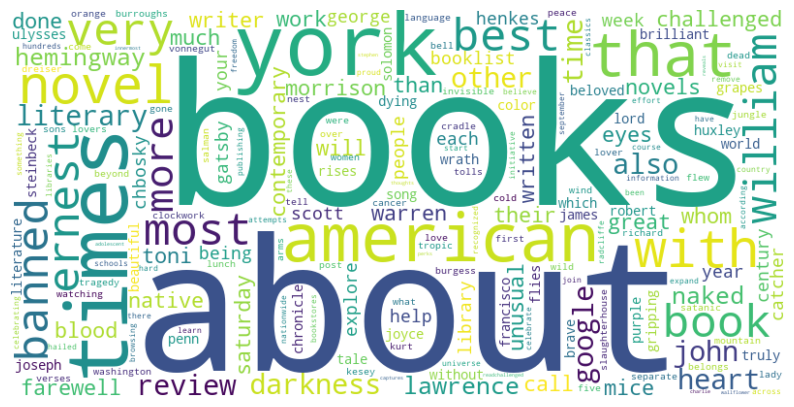

In [59]:
# create a word cloud
# create dictionary with word counts
gb_word_freq = dict(zip(google_books_df['word'], google_books_df['count']))
print(gb_word_freq)

# generate wordclound using WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate_from_frequencies(gb_word_freq)

# use matplotlib to display the wordcloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Clustering

In [60]:
# import csv as df
labeled_api_df = pd.read_csv('C:/Users/hisie/OneDrive/Documents/CU Boulder/MSDS/Spring 2025/Books_News.csv')

# concatenate the two dfs
descriptions_labeled_df = pd.concat([labeled_reddit_df, labeled_api_df], ignore_index=True)

# print head
print(descriptions_labeled_df)

              Label                                        Description
0     Banned_Reddit  People who have read banned book specifically ...
1     Banned_Reddit  Julianne Moore Great Shock After Donald Trump ...
2     Banned_Reddit  Utah students can longer bring personal copies...
3     Banned_Reddit  Utah outlaws books Judy Blume and Sarah Maas f...
4     Banned_Reddit  Multi level barrage book bans unprecedented sa...
...             ...                                                ...
9034       New_News  Forget about Black Friday and Cyber Monday or ...
9035       New_News  Don t miss the ending of Akira Toriyama s fina...
9036       New_News  Sunrise on the Reaping Hardcover was Released ...
9037       New_News  The duo are celebrating years since their TARD...
9038       New_News  I do not recommend drawings in fact I absolute...

[9039 rows x 2 columns]


In [61]:
# get the labels and descriptions as lists
all_labels = descriptions_labeled_df['Label'].tolist()
all_descriptions = descriptions_labeled_df['Description'].fillna("").astype(str).tolist()

In [62]:
# use count vectorizer to create a df with 14 columns

# initialize the CountVectorizer
clust_cv = CountVectorizer(
        input="content", 
        lowercase=True, 
        stop_words = "english",
        max_features=10,
        tokenizer=MY_LEMMER
        )

# fit and transform the data
description_matrix = clust_cv.fit_transform(all_descriptions)  
# get the vocab from the matrix
all_vocab = clust_cv.get_feature_names_out()
# convert the sparse matrix into a regular array
description_matrix = description_matrix.toarray()  
# use the covab as the column names
col_names = clust_cv.get_feature_names_out()
# create a data frame with the array
description_matrix_df = pd.DataFrame(description_matrix,columns=col_names)
print(description_matrix_df.head())

C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


   banned  book  don  just  library  like  people  read  school  think
0       1     3    0     0        0     0       1     2       0      0
1       0     1    0     0        0     0       0     0       1      0
2       1     1    0     0        0     0       0     0       1      0
3       0     1    0     0        0     0       0     0       0      0
4       0     1    0     0        0     0       0     0       0      0


In [63]:
# add the labels to the df
# convert the labels from list to df
all_labels_df = DataFrame(all_labels,columns=['LABEL'])
# add labeled df to books_news_df
dfs = [all_labels_df, description_matrix_df]
clust_df = pd.concat(dfs,axis=1, join='inner')

# want to use random 20 rows (with index reset)
#clust_df = clust_df.sample(n=20, random_state=580).reset_index(drop=True)

# DF with labels
print(clust_df)

              LABEL  banned  book  don  just  library  like  people  read  \
0     Banned_Reddit       1     3    0     0        0     0       1     2   
1     Banned_Reddit       0     1    0     0        0     0       0     0   
2     Banned_Reddit       1     1    0     0        0     0       0     0   
3     Banned_Reddit       0     1    0     0        0     0       0     0   
4     Banned_Reddit       0     1    0     0        0     0       0     0   
...             ...     ...   ...  ...   ...      ...   ...     ...   ...   
9034       New_News       0     0    0     0        0     0       0     0   
9035       New_News       0     0    1     0        0     0       0     0   
9036       New_News       0     0    0     0        0     0       0     0   
9037       New_News       0     0    0     0        0     0       0     0   
9038       New_News       0     0    0     0        0     0       0     0   

      school  think  
0          0      0  
1          1      0  
2        

In [64]:
# save the labels
clust_labels = clust_df['LABEL'].astype('category')
clust_labels = clust_labels.tolist()
# drop labels column
clust_df = clust_df.drop(columns=['LABEL'])

In [65]:
scaler = StandardScaler()
clust_df = scaler.fit_transform(clust_df)

In [66]:
pca = PCA(n_components=3)
clust_df = pca.fit_transform(clust_df)

For n_clusters = 2 The average silhouette_score is : 0.7099067601208399
For n_clusters = 3 The average silhouette_score is : 0.6074432043788053
For n_clusters = 4 The average silhouette_score is : 0.5938737738610083


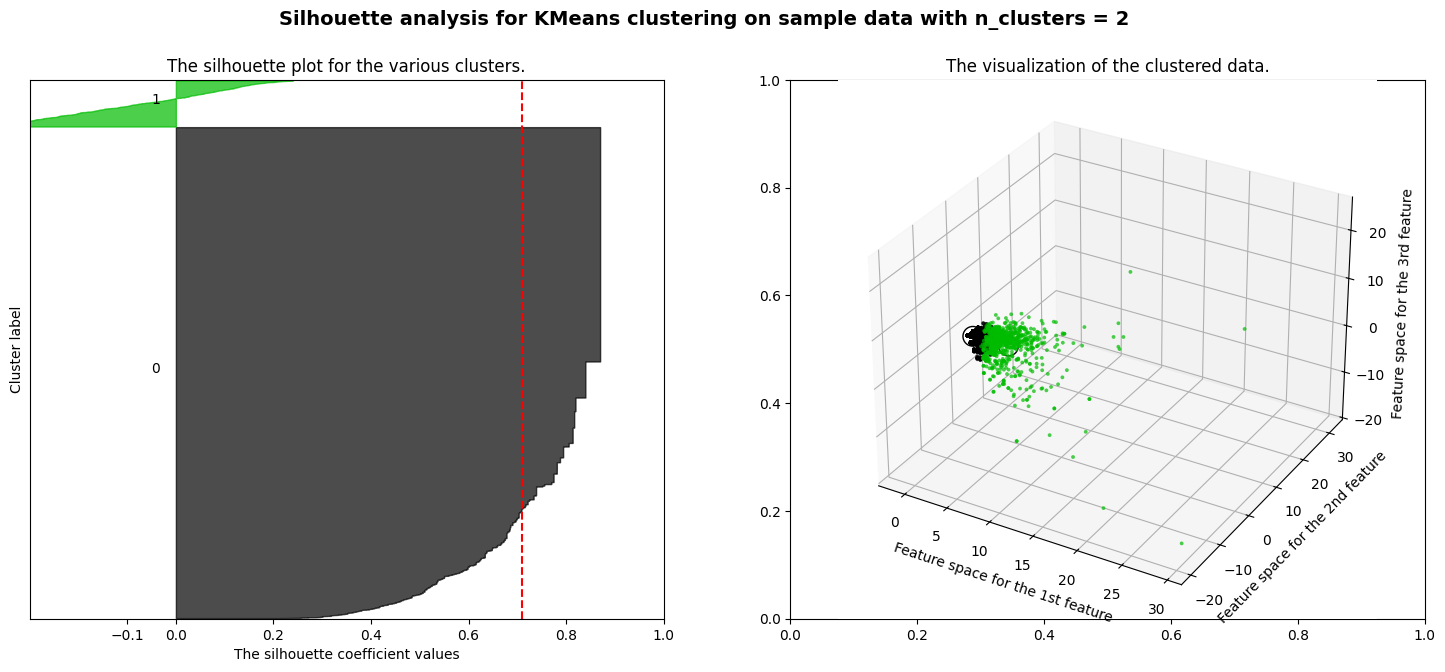

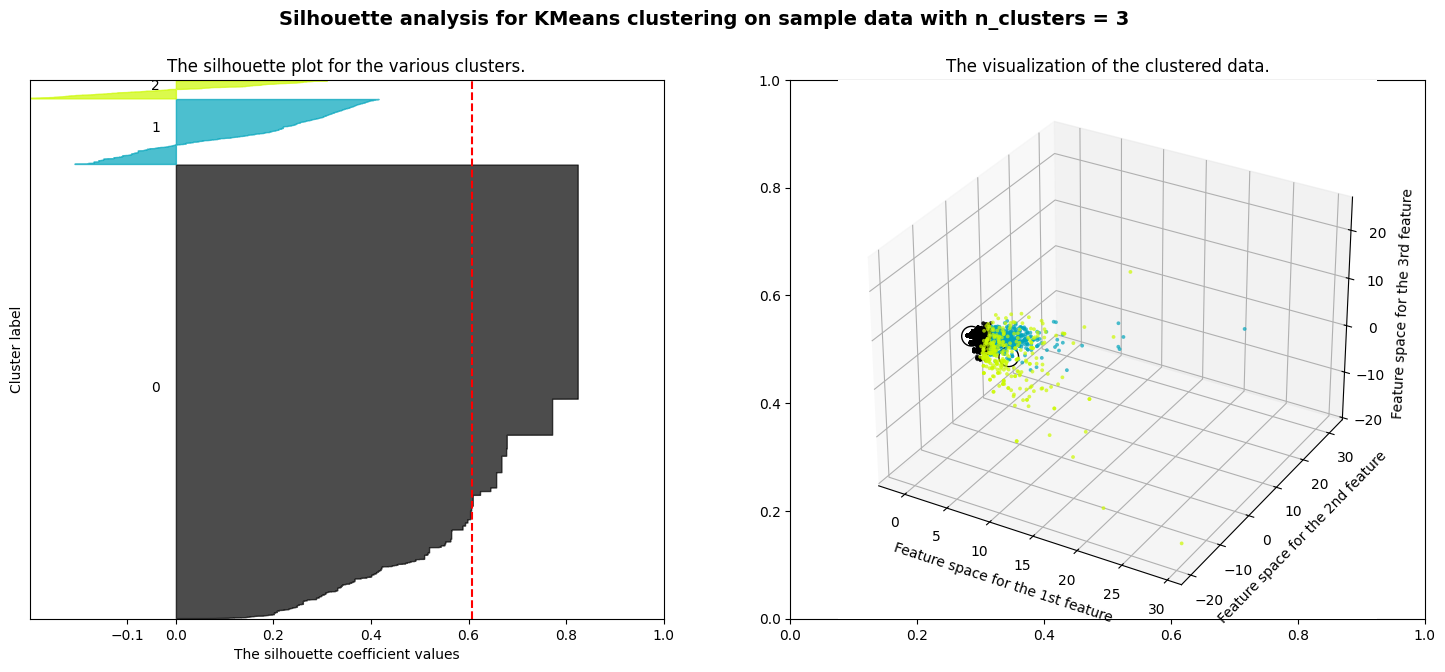

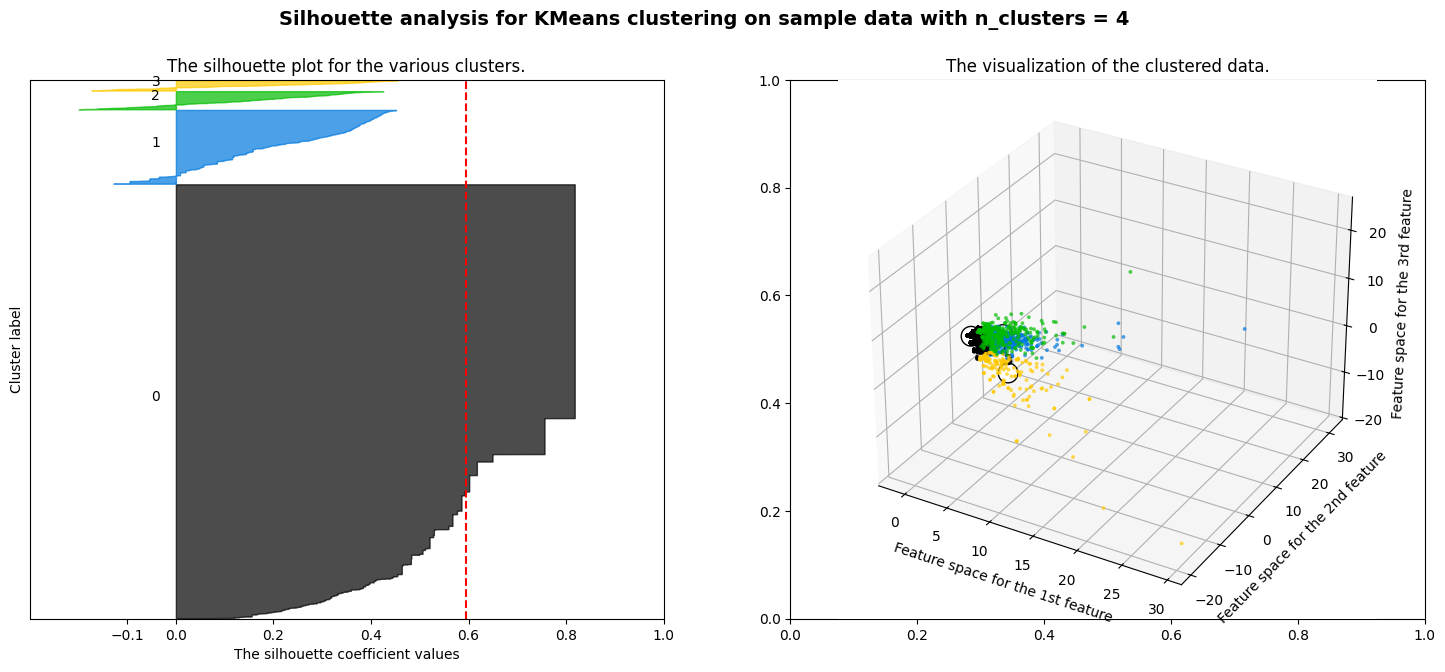

In [67]:
# Silhouette Method taken from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# selected range of clusters with 5 at center because I know that is how many groups is in my label
range_n_clusters = [2, 3, 4]

# perform silhouette method for each cluster size
for n_clusters in range_n_clusters:

    # Initialize subplots with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    # change size of figure so its easier to read
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # only needs zero to one because the values are all between zero and one
    ax1.set_xlim([-0.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly
    ax1.set_ylim([0, len(clust_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, random_state=20)
    # fit k means model to clust_df and asssign each point to a cluster
    cluster_labels = clusterer.fit_predict(clust_df)

    # measure how similar each point is to its own cluster compared to others
    silhouette_avg = silhouette_score(clust_df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(clust_df, cluster_labels)

# PLOT SILOUHETTE SCORES

    # starting point for cluster plot
    y_lower = 10
    # loop through each cluster
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        # determine the plot range with number of data poitns in the cluster and y_lower
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        # chooses a unique color assigned to each cluster
        color = cm.nipy_spectral(float(i) / n_clusters)
        # this is what filles out the silhouette area
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot, adds 10 for space
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    # assigns unique colors to each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # initialize second plot that is the first row, second column, second plot, and will be 3d
    ax2 = fig.add_subplot(122, projection='3d')
    # plot results as 3d scatter plot
    ax2.scatter(
        clust_df[:, 0], clust_df[:, 1], clust_df[:, 2], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        centers[:, 2],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    #loops through cluster centers and plots them on the 3d scatter plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.set_zlabel("Feature space for the 3rd feature")

    # add main title to the figure
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

# display all the plots
plt.show()

In [68]:
# instantiate the KMeans class with 4 clusters (bc of 4 topics) and normailize the data
my_k = KMeans(n_clusters=4, random_state=23)
# fit to the data
my_k.fit(clust_df)
# get the labels from the model
k_labels=my_k.predict(clust_df)
print(k_labels)

[3 0 0 ... 0 0 0]


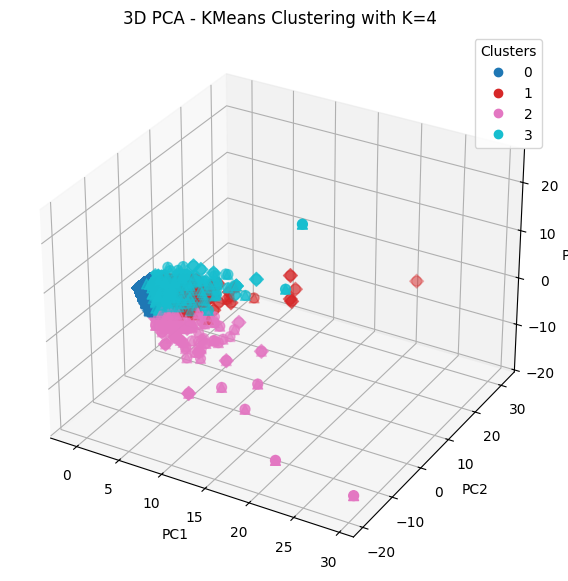

In [69]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot
scatter = ax.scatter(clust_df[:, 0], clust_df[:, 1], clust_df[:, 2],
                     c=k_labels, cmap='tab10', s=50)

# add labels back to data plot
unique_labels = list(set(clust_labels))
markers = ['o', '^', 's', 'D']

for i, label in enumerate(unique_labels):
    idx = [j for j, l in enumerate(clust_labels) if l == label]
    ax.scatter(clust_df[idx, 0], clust_df[idx, 1], clust_df[idx, 2],
               c=[k_labels[j] for j in idx], cmap='tab10', s=50,
               marker=markers[i % len(markers)], label=label)

ax.set_title("3D PCA - KMeans Clustering with K=4")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

# LDA

In [70]:
# initialize the CountVectorizer
lda_cv = CountVectorizer(
        input="content", 
        lowercase=True, 
        stop_words = "english",
        max_features=1000,
        tokenizer=MY_LEMMER
        )

# fit and transform the data
description_matrix_lda = lda_cv.fit_transform(all_descriptions)  
# get the vocab from the matrix
lda_vocab = lda_cv.get_feature_names_out()
# convert the sparse matrix into a regular array
description_matrix_lda = description_matrix_lda.toarray()  
# use the covab as the column names
lda_col_names = lda_cv.get_feature_names_out()
# create a data frame with the array
description_matrix_lda_df = pd.DataFrame(description_matrix_lda,columns=lda_col_names)
print(description_matrix_lda_df.head())

C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


   ability  able  absolutely  absurd  abuse  access  according  account  \
0        0     0           0       0      0       0          0        0   
1        0     0           0       0      0       0          0        0   
2        0     0           0       0      0       0          0        0   
3        0     0           0       0      0       0          0        0   
4        0     0           0       0      0       0          0        0   

   accurate  act  ...  wrote  www  yeah  year  yep  yes  young  younger  \
0         0    0  ...      0    0     0     0    0    0      0        0   
1         0    0  ...      0    0     0     0    0    0      0        0   
2         0    0  ...      0    0     0     0    0    0      0        0   
3         0    0  ...      0    0     0     0    0    0      0        0   
4         0    0  ...      0    0     0     0    0    0      0        0   

   youtube  zero  
0        0     0  
1        0     0  
2        0     0  
3        0     0  
4  

In [71]:
# create function for creating lda model
def create_lda_model(num_topics, df):
    my_lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=100, learning_method='online')
    lda_model = my_lda_model.fit_transform(df)
    return my_lda_model

# create function for printing the topics in a lda model
def print_topics(model, vectorizer, top_n=15):
    # iterate through the model componenets
    for index, topic in enumerate(model.components_):
        print("Topic:  ", index)
        # sort to get the top n words
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
        
# function for displaying the lda words
def display_topics(lda_model, num_topics, num_top_words=15):
    # get the word topic and transpose it
    word_topic = np.array(lda_model.components_)
    #print(word_topic)
    word_topic = word_topic.transpose()

    # get the vocab from the vectorizer
    vocab_array = np.asarray(vocab)

    # choose fontsize
    fontsize_base = 20

    # iterate through each topic and add words to the column for it
    for t in range(num_topics):
        plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
        plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
        plt.xticks([])  # remove x-axis markings ('ticks')
        plt.yticks([]) # remove y-axis markings ('ticks')
        plt.title('Topic #{}'.format(t))
        top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
        top_words_idx = top_words_idx[:num_top_words]
        top_words = vocab_array[top_words_idx]
        top_words_shares = word_topic[top_words_idx, t]
        for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
            plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
                    ##fontsize_base*share)

    plt.tight_layout()
    plt.show()

In [72]:
# create lda with k=3
lda2 = create_lda_model(2, description_matrix_lda)
# print the topics
print("LDA with k=2")
print_topics(lda2, lda_cv, 15)

LDA with k=2
Topic:   0
[('book', 4382.860477695407), ('read', 1166.7966090059508), ('school', 899.1369911728356), ('library', 890.1263219122893), ('banned', 746.8724241040578), ('don', 660.8365619114593), ('just', 651.7131561098188), ('people', 649.4286121921765), ('ban', 631.6656905216909), ('like', 627.8873527978476), ('kid', 551.36812564917), ('think', 484.6871402956944), ('child', 416.11268783534763), ('reading', 415.86306531275704), ('want', 403.3948771721268)]
Topic:   1
[('like', 935.0424317769983), ('people', 881.081620156893), ('just', 715.4121190953613), ('don', 536.2756882529502), ('right', 476.14101524042417), ('removed', 466.5179384039039), ('thing', 450.1607366485985), ('make', 414.92865460419637), ('time', 391.78222449191986), ('good', 368.38486030455977), ('amazon', 364.73809174096345), ('think', 360.8309533634659), ('way', 349.471773942842), ('new', 320.49595529686945), ('said', 312.3479836831611)]


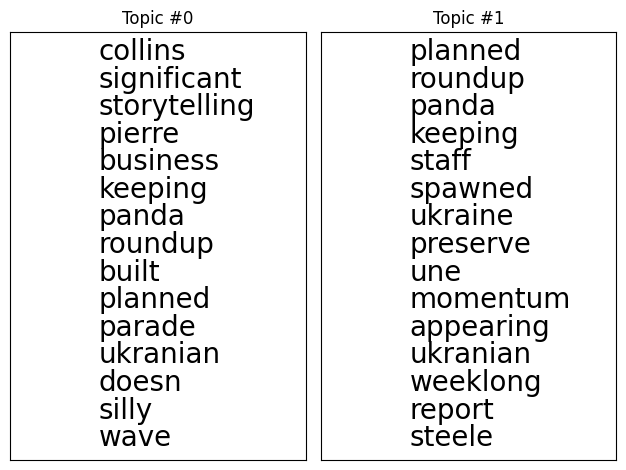

In [73]:
display_topics(lda2, 2, 15)

In [74]:
lda_model2 = lda2.fit_transform(description_matrix_lda)
vect_lda2 = lda_cv.fit_transform(all_descriptions)  # fit the vectorizer again to get the lda matrix

C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [75]:
# create lda with k=3
lda4 = create_lda_model(4, description_matrix_lda)
# print the topics
print("LDA with k=4")
print_topics(lda4, lda_cv, 15)

LDA with k=4
Topic:   0
[('book', 2393.3865963641656), ('school', 898.9155986079618), ('library', 889.9203088001237), ('banned', 746.2141444284562), ('ban', 610.8313333616243), ('kid', 551.1866049057897), ('child', 429.67971731543986), ('banning', 347.1361092968345), ('public', 303.352992195374), ('don', 258.8348582546904), ('parent', 237.5416196764353), ('just', 220.85183740309847), ('content', 211.52677885416307), ('read', 210.7542041192732), ('deleted', 209.2209721545362)]
Topic:   1
[('book', 571.5689616204237), ('amazon', 364.567318311034), ('year', 298.19436044418495), ('woman', 284.3067671228712), ('use', 253.63336566667246), ('just', 247.54956082709282), ('http', 240.11668245498709), ('goodreads', 233.90932546695979), ('cover', 233.5029569233483), ('new', 225.9197928348124), ('bookstore', 208.5124053530647), ('like', 205.59190826750967), ('store', 188.18317764464163), ('different', 182.77073194881677), ('hate', 175.49148196759822)]
Topic:   2
[('book', 1452.6920567610894), ('li

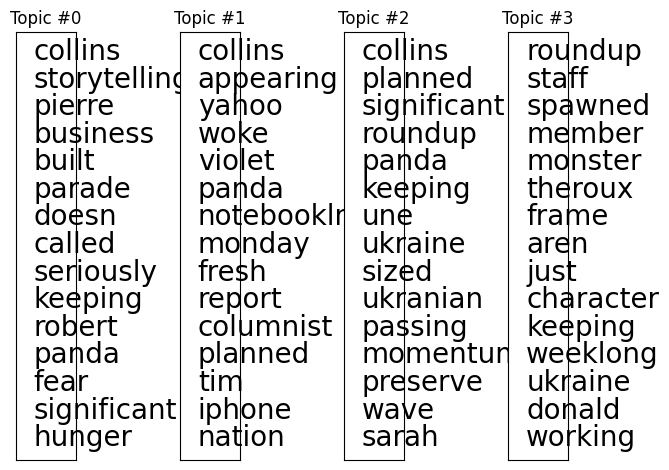

In [76]:
display_topics(lda4, 4, 15)

In [79]:
import pyLDAvis
print(pyLDAvis.__file__)
import pyLDAvis.sklearn as LDAvis
import pyLDAvis.gensim 
CountVectorizer.get_feature_names = CountVectorizer.get_feature_names_out



C:\Users\hisie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyLDAvis\__init__.py


In [ ]:

from scipy.sparse import csr_matrix

dtm_sparse = csr_matrix(description_matrix_lda)

panel = LDAvis.prepare(lda2, dtm_sparse, lda_cv, mds='tsne')
pyLDAvis.save_html(panel, 'lda_viz.html')
pyLDAvis.enable_notebook() ## not using notebook



In [83]:
panel = LDAvis.prepare(lda4, dtm_sparse, lda_cv, mds='tsne')
pyLDAvis.save_html(panel, 'lda_viz2.html')
pyLDAvis.enable_notebook() ## not using notebook